# Approximation of $\pi$ by simple series

From the calculus, you probably know this series
$$\frac{\pi^2}{6} = \sum_{k = 1}^\infty \frac{1}{k^2}$$
but unfortunately, it is converging slowly.

In [9]:
n = 1000000;
sum = 0.0;
Do[sum = sum + 1.0/(k*k), {k, 1, n}]
Print["Accuracy with ", n, " terms is ", Pi - Sqrt[6.0*sum]]

                                         -7
Accuracy with 1000000 terms is 9.54929 10


Another series
$$\frac{\pi^4}{90} = \sum_{k = 1}^\infty \frac{1}{k^4}$$
converges much faster. Why?

In [17]:
n = 1000;
sum = 0.0;
Do[sum = sum + 1.0/k^4, {k, 1, n}]
Print["Accuracy with ", n, " terms is ", Pi - (90.0*sum)^(1/4)]

                                      -10
Accuracy with 1000 terms is 2.41523 10


# Archimedes' approximation of $\pi$

## Basic iterations

There are two possibilities to write the recurrence relation for the circumference of polygons in the circle:
$$y_{k+1} = \frac{2^{k+1}}{\sqrt{2}}\sqrt{1-\sqrt{1-\left(\frac{y_k}{2^k}\right)^2}}$$
which is not suited for numerical evaluation as it includes the subtraction of two close numbers, and
$$x_{k+1} = x_k\frac{2}{\sqrt{1+\sqrt{1-\left(\frac{x_k}{2^k}\right)^2}}}$$
where we add up two close numbers.

Let us calculate the sequences numerically and compare them with the exact sequence given by
$$2^k \sin(\pi/2^k)$$

Legended[-Graphics-, Placed[PointLegend[{Directive[PointSize[0.0128333], 
 
>       AbsoluteThickness[2], RGBColor[0, 0, 1]], 
 
>      Directive[PointSize[0.0128333], AbsoluteThickness[2], RGBColor[0, 1, 0]]}, 
 
>     {y series, x series}, LegendMarkers -> {{False, Automatic}, {False, Automatic}}, 
 
>     Joined -> {False, False}, LabelStyle -> {}, LegendLayout -> Column], After, 
 
>    Identity]]
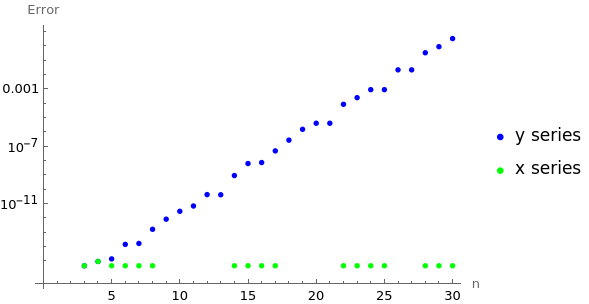

In [21]:
n = 30;
y = ConstantArray[0.0, n]; x = ConstantArray[0.0, n];
y[[1]] = 2.0; x[[1]] = 2.0;
tk = 2.0;
Do[
 y[[i]] = 2.0 tk Sqrt[(1.0 - Sqrt[1.0 - (y[[i - 1]]/tk)^2])/2.0];
 x[[i]] = x[[i - 1]] Sqrt[2.0/(1.0 + Sqrt[1.0 - (x[[i - 1]]/tk)^2])];
 tk = 2.0 tk,
 {i, 2, n}
 ]
exact = Array[2^# Sin[Pi/2^#] &, n];
ListLogPlot[{Abs[exact - y], Abs[exact - x]}, 
 PlotStyle -> {Blue, Green}, 
 PlotLegends -> {"y series", "x series"}, AxesLabel -> {"n", "Error"}]

The absolute error of the consequent approximations of $\pi$

Legended[-Graphics-, Placed[PointLegend[{Directive[PointSize[0.011], 
 
>       AbsoluteThickness[2], RGBColor[0, 0, 1]], 
 
>      Directive[PointSize[0.011], AbsoluteThickness[2], RGBColor[0, 1, 0]]}, 
 
>     {y series, x series}, LegendMarkers -> {{False, Automatic}, {False, Automatic}}, 
 
>     Joined -> {False, False}, LabelStyle -> {}, LegendLayout -> Column], After, 
 
>    Identity]]
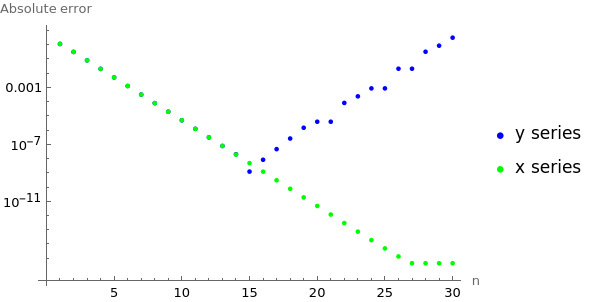

In [28]:
ListLogPlot[{Abs[Pi - y], Abs[Pi - x]}, 
 PlotStyle -> {Blue, Green}, 
 PlotLegends -> {"y series", "x series"}, AxesLabel -> {"n", "Absolute error"}]

## Acceleration of convergence - Aitken's $\Delta^2$ process

First, we load the module with functions for acceleration:

In [29]:
<< BasicFunctionsTMF057`

Aitken's $\Delta^2$-process is a simple technique to accelerate the linear convergence of a series $x_k$ by introducing a new series $Ax_k$ that converges faster but still linearly:
$$Ax_k = x_k - \frac{(\Delta x_k)^2}{\Delta^2 x_k}$$
where $\Delta x_k = x_{k+1} - x_k$ and $\Delta^2 x_k = x_{k+2} - 2 x_{k+1} + x_k$.

We can accelerate several times. Below, we apply Aitken's $\Delta^2$-process 3 times:

Legended[-Graphics-, Placed[PointLegend[{Directive[PointSize[0.011], 
 
>       AbsoluteThickness[2], RGBColor[0, 0, 1]], 
 
>      Directive[PointSize[0.011], AbsoluteThickness[2], RGBColor[0, 1, 0]], 
 
>      Directive[PointSize[0.011], AbsoluteThickness[2], RGBColor[1, 0, 0]], 
 
>      Directive[PointSize[0.011], AbsoluteThickness[2], RGBColor[0.6, 0.4, 0.2]]}, 
 
>     {original x series, first acceleration, second acceleration, third acceleration}, 
 
>     LegendMarkers -> 
 
>      {{False, Automatic}, {False, Automatic}, {False, Automatic}, {False, Automatic}}, 
 
>     Joined -> {False, False, False, False}, LabelStyle -> {}, LegendLayout -> Column], 
 
>    After, Identity]]
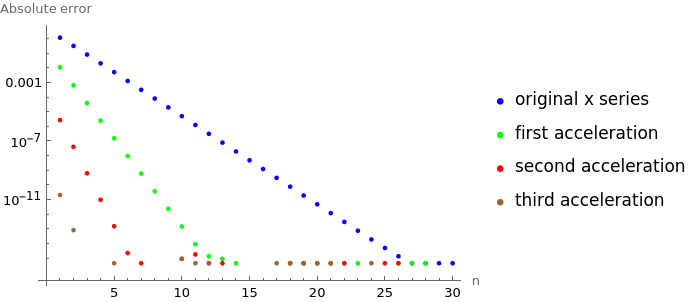

In [30]:
Ax1 = MyAitkenDeltaSquareProcess[x];
Ax2 = MyAitkenDeltaSquareProcess[Ax1];
Ax3 = MyAitkenDeltaSquareProcess[Ax2];
ListLogPlot[{Abs[Pi - x], Abs[Pi - Ax1], Abs[Pi - Ax2], 
  Abs[Pi - Ax3]}, PlotStyle -> {Blue, Green, Red, Brown}, 
 PlotLegends -> {"original x series", 
   "first acceleration", 
   "second acceleration", 
   "third acceleration"}, AxesLabel -> {"n", "Absolute error"}]

# Chudnovsky approximation of $\pi$

This is the actual series which is used by Mathematica and other programs to calculate $\pi$ efficiently (Chudnovsky algorithm)
$$\frac{1}{\pi} = 12\sum_{k=0}^{\infty}\frac{(-1)^{k}(6k)!(545140134k+13591409)}{(3k)!(k!)^{3}(640320)^{3k+3/2}}$$

In [117]:
MyPi[nn_] = 
  1/(12 Sum[(-1)^
       k (6 k)! (163*3344418 k + 13591409)/((3 k)! (k!)^3 640320^(
          3 k + 3/2)), {k, 0, nn}]);
Print[N[Pi, 50], ", exact Pi"]
nterms = 3;
Do[
 Print[N[MyPi[i - 1], 50], ", # terms = ", i, ", rel. error ", 1.0 N[Abs[Pi - MyPi[i - 1]]/Pi, 50]],
 {i, 1, nterms}
 ]

3.1415926535897932384626433832795028841971693993751, exact Pi
3.1415926535897342076684535915782983407622332609157, # terms = 1, rel. error 
 
              -14
>   1.87901 10
3.1415926535897932384626433835873506884758663459964, # terms = 2, rel. error 
 
             -29
>   9.7991 10
3.1415926535897932384626433832795028841971676788548, # terms = 3, rel. error 
 
              -43
>   5.47659 10
